####**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

####**Data Collection and Processing**

In [ ]:
# loading the dataset to pandas DataFrame and printing the first 5 rows of the dataframe
df = pd.read_csv("/content/Loan Prediction Problem Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# number of rows and columns
df.shape

(614, 13)

In [ ]:
#get more informasion about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# find the sum of missing value for each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#fill the numerical missing value with mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
#fill the categorical missing value with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
# recheck the missing value for each column
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

####**Exploratory Data Analysis**

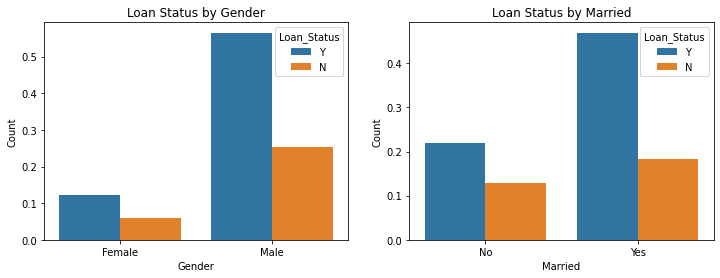

In [ ]:
#categorical data visualization
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Loan Status by Gender")
axis[1].set_title("Loan Status by Married")
axis_y = "Count"

# Plot Gender column
gp_gender = df.groupby('Gender')["Loan_Status"].value_counts()/len(df)
gp_gender = gp_gender.to_frame().rename({"Loan_Status": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Gender', y= axis_y, hue='Loan_Status', data=gp_gender, ax=axis[0])

# Plot Married column
gp_married = df.groupby('Married')["Loan_Status"].value_counts()/len(df)
gp_married = gp_married.to_frame().rename({"Loan_Status": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Married', y= axis_y, hue='Loan_Status', data=gp_married, ax=axis[1])

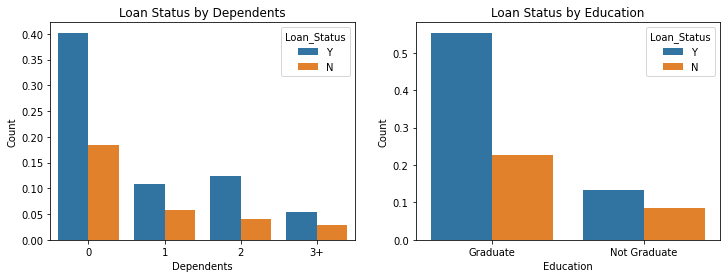

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Loan Status by Dependents")
axis[1].set_title("Loan Status by Education")
axis_y = "Count"

# Plot Dependents column
gp_Dependents = df.groupby('Dependents')["Loan_Status"].value_counts()/len(df)
gp_Dependents = gp_Dependents.to_frame().rename({"Loan_Status": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Loan_Status', data=gp_Dependents, ax=axis[0])

# Plot Education column
gp_Education = df.groupby('Education')["Loan_Status"].value_counts()/len(df)
gp_Education = gp_Education.to_frame().rename({"Loan_Status": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Education', y= axis_y, hue='Loan_Status', data=gp_Education, ax=axis[1])

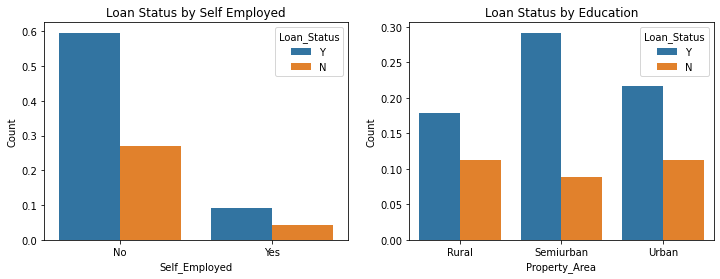

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Loan Status by Self Employed")
axis[1].set_title("Loan Status by Education")
axis_y = "Count"

# Plot Self_Employed column
gp_Self_Employed = df.groupby('Self_Employed')["Loan_Status"].value_counts()/len(df)
gp_Self_Employed = gp_Self_Employed.to_frame().rename({"Loan_Status": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Self_Employed', y= axis_y, hue='Loan_Status', data=gp_Self_Employed, ax=axis[0])

# Plot Property_Area column
gp_Property_Area = df.groupby('Property_Area')["Loan_Status"].value_counts()/len(df)
gp_Property_Area = gp_Property_Area.to_frame().rename({"Loan_Status": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Property_Area', y= axis_y, hue='Loan_Status', data=gp_Property_Area, ax=axis[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


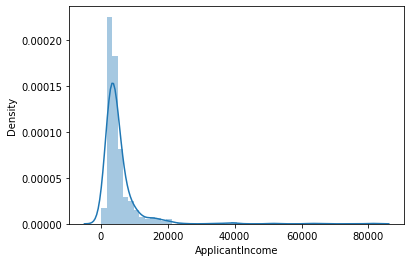

In [ ]:
#numerical data visualization
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


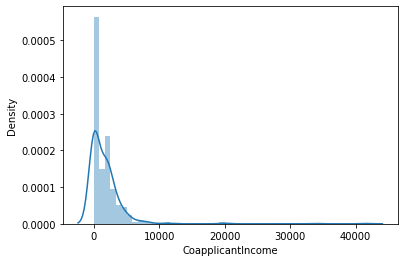

In [ ]:
sns.distplot(df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


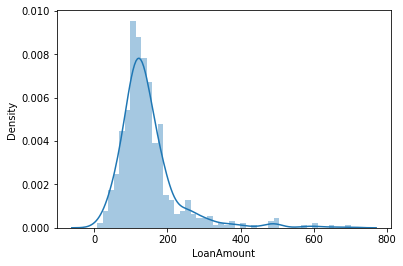

In [ ]:
sns.distplot(df['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


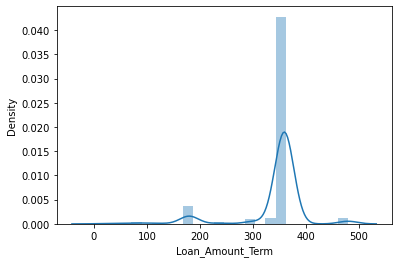

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


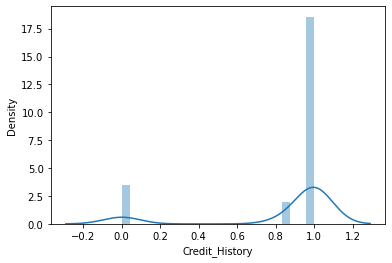

In [ ]:
sns.distplot(df['Credit_History'])

####**Add New Feature to Dataset**

In [ ]:
#total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


####**Log Transformation to the Feature**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


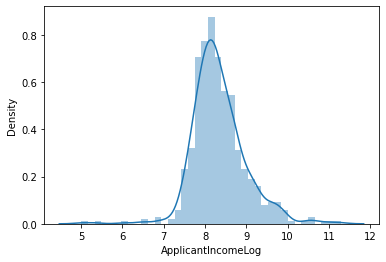

In [ ]:
#apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


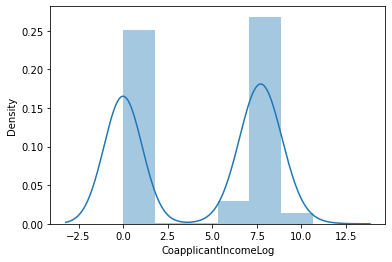

In [ ]:
df['CoapplicantIncomeLog'] = np.log(1+df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


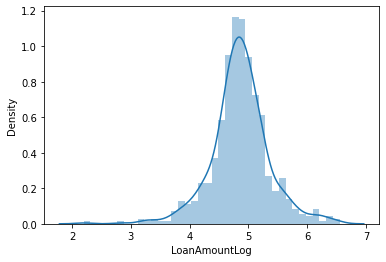

In [ ]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


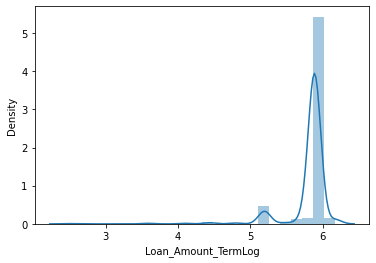

In [ ]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_TermLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


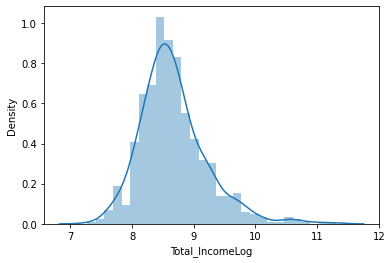

In [ ]:
df['Total_IncomeLog'] = np.log(df['Total_Income'])
sns.distplot(df['Total_IncomeLog'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


####**Coorelation Matrix**

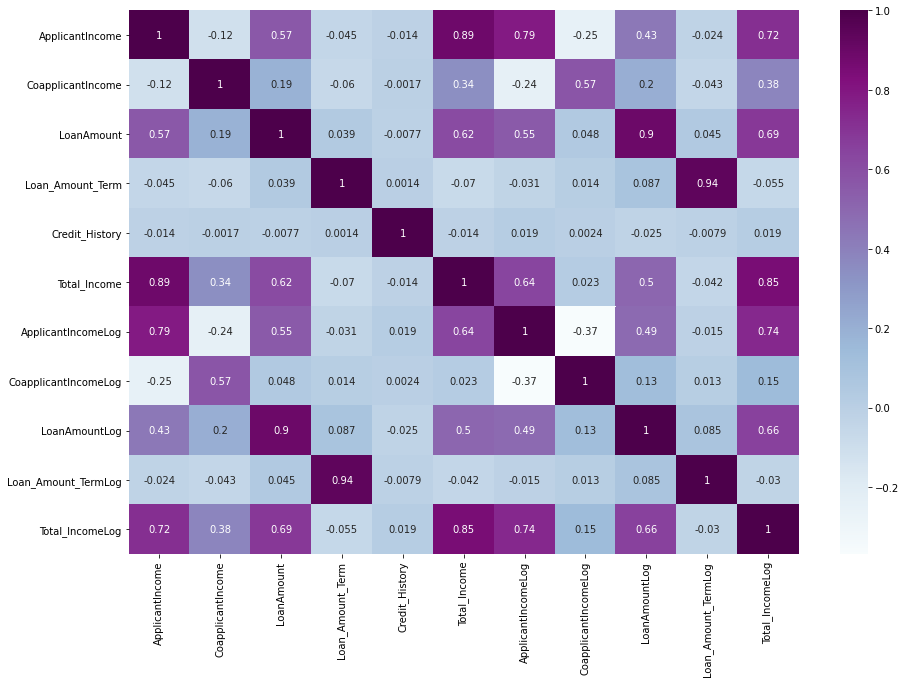

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [ ]:
#drop unnecessary column
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


####**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


#####SMOTE Method

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# define input and output feature
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_TermLog', 'Total_IncomeLog'],
      dtype='object')

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_TermLog', 'Total_IncomeLog']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,1.0,0.0,0.0,0.000000,0.000000,1.000000,2.000000,8.674026,4.986426,5.886104,8.674026
1,1.0,1.0,1.0,0.000000,0.000000,1.000000,0.000000,8.430109,4.852030,5.886104,8.714568
2,1.0,1.0,0.0,0.000000,1.000000,1.000000,2.000000,8.006368,4.189655,5.886104,8.006368
3,1.0,1.0,0.0,1.000000,0.000000,1.000000,2.000000,7.856707,4.787492,5.886104,8.505323
4,1.0,0.0,0.0,0.000000,0.000000,1.000000,2.000000,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
839,1.0,1.0,1.0,0.000000,0.899775,0.084410,0.000000,7.671416,4.181759,5.722056,7.671416
840,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,8.188806,4.885454,5.208133,8.962309
841,1.0,1.0,1.0,0.000000,0.000000,0.945310,1.346576,8.146838,5.193852,5.886104,8.745865
842,1.0,1.0,1.0,0.000000,0.000000,0.885095,2.000000,8.315028,5.004659,5.886104,8.746538


In [ ]:
y = pd.DataFrame(y)
y.columns = ['Loan_Status']

In [ ]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
839,0
840,0
841,0
842,0


####**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(844, 11) (675, 11) (169, 11)


#### **Training Model**

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)
    model.fit(x_train, y_train)
    print("Training Accuracy is", model.score(x_train, y_train)*100)
    print("Testing Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

#####**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy is 70.81481481481482
Testing Accuracy is 69.23076923076923
Cross validation is 70.50084530853762


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
expected = y_test
predicted = model.predict(x_test)

In [ ]:
#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63        86
           1       0.64      0.87      0.73        83

    accuracy                           0.69       169
   macro avg       0.72      0.70      0.68       169
weighted avg       0.72      0.69      0.68       169



In [ ]:
# Out of 35 'Y' outcomes, 20 were right and 15 were wrong similarly, for'N', 88 were right and 0 were wrong.
print(metrics.confusion_matrix(expected, predicted))

[[45 41]
 [11 72]]


#####**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Training Accuracy is 100.0
Testing Accuracy is 76.33136094674556
Cross validation is 75.95872076641308


In [ ]:
expected = y_test
predicted = model.predict(x_test)

In [ ]:
#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        86
           1       0.76      0.76      0.76        83

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.76      0.76      0.76       169



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[66 20]
 [20 63]]


#####**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training Accuracy is 100.0
Testing Accuracy is 82.84023668639054


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Cross validation is 83.0684699915469


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
expected = y_test
predicted = model.predict(x_test)

In [ ]:
#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        86
           1       0.79      0.89      0.84        83

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[66 20]
 [ 9 74]]


#####**ExtraTreesClassifier**

In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Training Accuracy is 100.0
Testing Accuracy is 84.61538461538461


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross validation is 83.541842772612


In [ ]:
expected = y_test
predicted = model.predict(x_test)

In [ ]:
#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        86
           1       0.82      0.88      0.85        83

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[70 16]
 [10 73]]


#####**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
model = SVC()
classify(model, X, y)

Training Accuracy is 70.66666666666667
Testing Accuracy is 69.23076923076923
Cross validation is 70.26486334178642


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
expected = y_test
predicted = model.predict(x_test)

In [ ]:
#  Printing the Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        86
           1       0.62      0.98      0.76        83

    accuracy                           0.69       169
   macro avg       0.78      0.70      0.67       169
weighted avg       0.79      0.69      0.67       169



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[36 50]
 [ 2 81]]


####**Hyperparameter Tuning**

In [ ]:
model = RandomForestClassifier()

In [ ]:
param_grid = {'n_estimators':[100, 300, 500], 'max_depth':[1,3,5]}

#####**GridSearchCV**

In [1]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(model, param_grid, n_jobs=-1)

In [ ]:
best_GS = clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
best_GS.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_GS.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [ ]:
best_GS.best_score_

0.7718518518518518

In [ ]:
print('Accuracy :', best_GS.score(x_test,y_test)*100)

Accuracy : 77.51479289940828


#####**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf = RandomizedSearchCV(model, param_grid, n_jobs=-1)

In [ ]:
best_RS = clf.fit(x_train, y_train)
best_RS

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
best_RS.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [ ]:
best_RS.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_RS.best_score_

0.7718518518518518

In [ ]:
print('Accuracy :', best_RS.score(x_test,y_test)*100)

Accuracy : 76.92307692307693


####**Confusion Matrix Logistic Regression**

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[67, 19],
       [11, 72]])

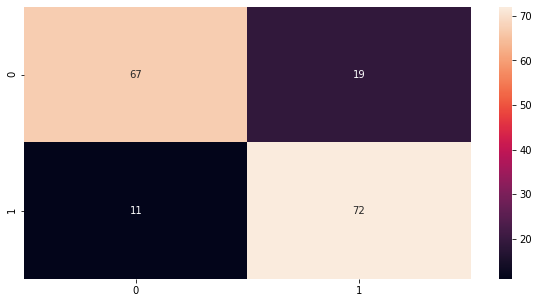

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)